In [4]:
from dataset_damage import *
import matplotlib.pyplot as plt
from soft_dice import *
from torch.utils.data import DataLoader
from monai.losses import DiceCELoss, DiceFocalLoss,GeneralizedDiceLoss
from monai.losses.dice import DiceLoss

annFile = 'damage_segmentation/train/COCO_train_annos.json'
root = 'damage_segmentation/train'
dataset_train = fashpedia(root,annFile,train=True)

annFile = 'damage_segmentation/val/COCO_val_annos.json'
root = 'damage_segmentation/val'
dataset_val = fashpedia(root,annFile,train=True)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [47]:
import torch.optim as optim
from torchvision.models.segmentation.deeplabv3 import DeepLabHead
n_classes = 1
mod = torchvision.models.segmentation.deeplabv3_resnet50(pretrained=True)
for module in mod.modules():
    module.requires_grad = False
mod.aux_classifier = None
mod.classifier[-1] = nn.Conv2d(256, 1, kernel_size=(1, 1), stride=(1, 1))

batch_size = 16
num_workers = 0
loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=torch.tensor(6.3208))

opt = optim.Adam(mod.parameters())
trainLoader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True,
                         drop_last=False,num_workers=num_workers)
valLoader = DataLoader(dataset_val, batch_size=int(batch_size/2), shuffle=True,
                         drop_last=False,num_workers=num_workers)

In [48]:
## code for calculating STD and mean

#std = torch.zeros(3)
#mu = torch.zeros(3)
#for im,_ in trainLoader:
#    #mu.append(im.mean(dim=[0,2,3]).tolist())
#    #std.append(im.std(dim=[0,2,3]).tolist())
#    mu += im.mean(dim=[0,2,3])
#    std += im.std(dim=[0,2,3])
#    
#mu = mu/len(trainLoader)
#std = std/len(trainLoader)



#pos = 0 
#neg = 0
#for _,mask in trainLoader:
#    pos += mask.view(-1).sum()
#    neg += (mask.view(-1)==0).sum()
#    

* Epoch 1/10
0 batch loss =  tensor(1.1674, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
1 batch loss =  tensor(1.2331, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
2 batch loss =  tensor(1.2641, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
3 batch loss =  tensor(1.0362, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


* Epoch 2/10
0 batch loss =  tensor(1.0249, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
1 batch loss =  tensor(1.0084, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
2 batch loss =  tensor(0.9261, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
3 batch loss =  tensor(1.0253, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


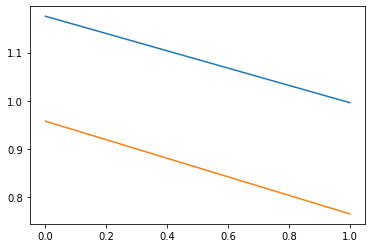

* Epoch 3/10
0 batch loss =  tensor(0.9340, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
1 batch loss =  tensor(0.9103, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
2 batch loss =  tensor(0.8320, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
3 batch loss =  tensor(0.9417, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


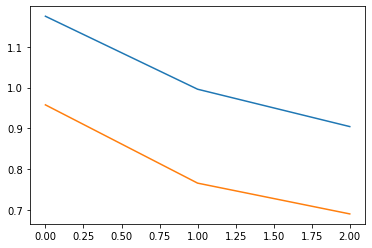

* Epoch 4/10
0 batch loss =  tensor(0.7958, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
1 batch loss =  tensor(0.8107, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
2 batch loss =  tensor(0.8133, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
3 batch loss =  tensor(0.7968, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


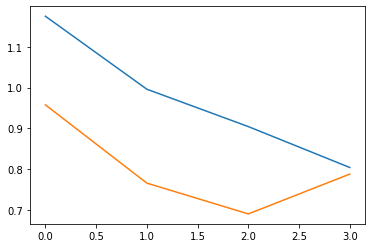

* Epoch 5/10
0 batch loss =  tensor(0.7693, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
1 batch loss =  tensor(0.7146, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
2 batch loss =  tensor(0.7104, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
3 batch loss =  tensor(0.7158, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


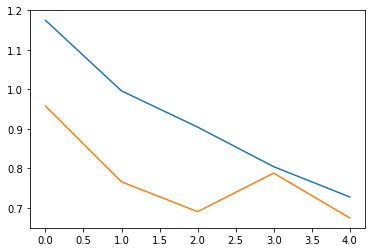

* Epoch 6/10
0 batch loss =  tensor(0.7266, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
1 batch loss =  tensor(0.6886, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
2 batch loss =  tensor(0.6023, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
3 batch loss =  tensor(0.7388, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


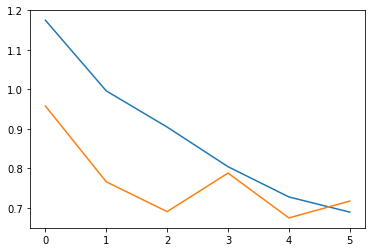

* Epoch 7/10
0 batch loss =  tensor(0.6700, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
1 batch loss =  tensor(0.5738, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
2 batch loss =  tensor(0.6310, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
3 batch loss =  tensor(0.6486, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


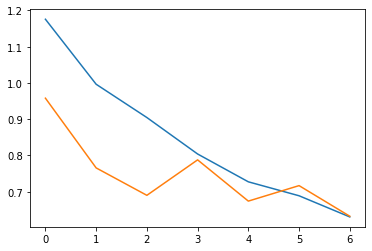

* Epoch 8/10
0 batch loss =  tensor(0.5708, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
1 batch loss =  tensor(0.6263, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
2 batch loss =  tensor(0.5520, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
3 batch loss =  tensor(0.6063, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


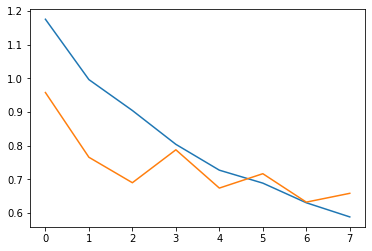

* Epoch 9/10
0 batch loss =  tensor(0.5711, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
1 batch loss =  tensor(0.5835, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
2 batch loss =  tensor(0.5135, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
3 batch loss =  tensor(0.4703, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


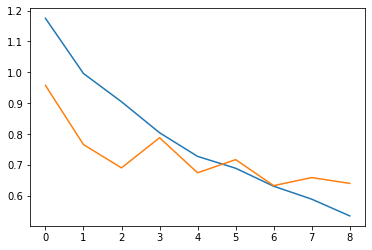

* Epoch 10/10
0 batch loss =  tensor(0.4510, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
1 batch loss =  tensor(0.4896, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
2 batch loss =  tensor(0.5267, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
3 batch loss =  tensor(0.5517, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


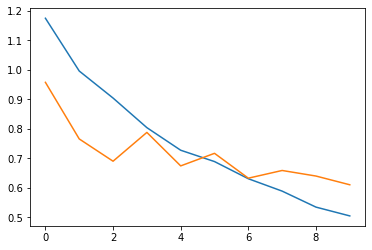

In [49]:
epochs = 10
device = 'cuda'
mod = mod.to(device)
lr = 1e-4
opt = optim.Adam(mod.parameters(),lr)

train_loss_lst = []
val_loss_lst = []
for epoch in range(epochs):
    print('* Epoch %d/%d' % (epoch+1, epochs))
    epoch_loss = 0
    val_loss = 0
    mod.train()  # train mode
    for b, (X_batch,Y_batch) in enumerate(trainLoader):
        #Y_batch = torch.argmax(Y_batch.to(device), dim=1)
        # set parameter gradients to zero
        opt.zero_grad()

        # forward
        Y_pred = mod(X_batch.to(device))['out']
        Y_batch = Y_batch.to(device)
        #Y_batch = torch.tensor(Y_batch, dtype=torch.long, device=device)
        loss = loss_fn(Y_pred, Y_batch) 
        #loss += ce_loss(Y_pred, Y_batch.softmax(dim=1).long().argmax(dim=1))  # forward-pass
        loss.backward()  # backward-pass
        opt.step()  # update weights

        # calculate metrics to show the user
        epoch_loss += loss.detach().item()
        if ((b) % 1) == 0:
            print(b,"batch loss = ", loss)
            
    mod.eval()
    with torch.no_grad():  # inference mode
        for X_batch,Y_batch in valLoader:
            Y_pred = mod(X_batch.to(device))['out']
            val_loss += loss_fn(Y_pred, Y_batch.to(device)).detach().item()
    
    val_loss = val_loss/(len(valLoader))    #*val_batch_sz)
    epoch_loss = epoch_loss/(len(trainLoader))
    
    train_loss_lst.append(epoch_loss)
    val_loss_lst.append(val_loss)
    plt.plot(train_loss_lst)
    plt.plot(val_loss_lst)
    plt.show()
        
 

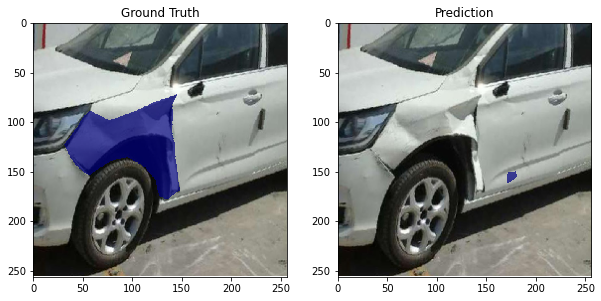

In [60]:
from functions import *

device = 'cpu'
mod.eval()

i = 5
mod = mod.cuda()
img, mask= dataset_val[i]
img = img.cuda()
out = mod(img.unsqueeze(0))['out'][0].cpu().detach()

plt_img = dataset_train.unnorm(img.cpu()).transpose(1,-1).transpose(0,-1)
size = (10,10)

my_cmap = copy.copy(cm.jet)
my_cmap.set_under('k', alpha=0)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=size,frameon=False)
ax1.set_title('Ground Truth')#'Ground Truth')
ax2.set_title('Prediction')#'Prediction')
ax1.axis([0, 256, 256, 0])
ax2.axis([0, 256, 256, 0])
ax1.imshow(plt_img)
ax1.imshow(mask[0],alpha=0.7,cmap=my_cmap, interpolation='none', clim=[1, 10])
ax2.imshow(plt_img)
ax2.imshow(out[0].sigmoid()>0.5,alpha=0.7,cmap=my_cmap, interpolation='none', clim=[1, 10])